In [2]:
%reload_ext autoreload
%autoreload 2
from CaliPytion.tools.standardcurve import StandardCurve

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
f = lambda x, a: a * x
concentrations = np.linspace(0, 10, 40)

rand = lambda size: np.random.normal(1, 0.01, size)


signals = f(concentrations, 0.5) + rand(len(concentrations))

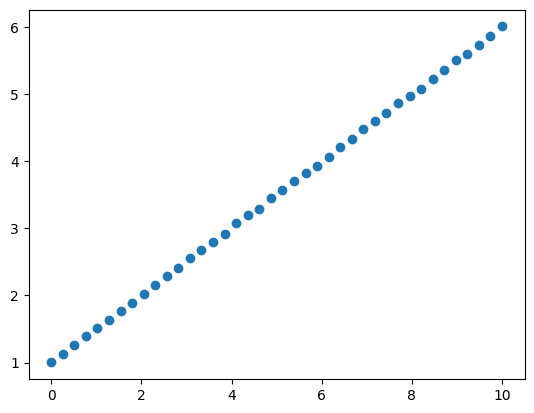

In [28]:
plt.scatter(concentrations, signals)

In [29]:
standard = StandardCurve(
    concentrations=concentrations,
    signals=signals,
    conc_unit="mmol / l",
    analyte_name="ABTS",
    wavelength=420,
)
print(standard.result_dict)

# standard.visualize()

Standard curve data was blanked.
{'Linear': -349.6953082150718, 'Quadratic': -348.6217882154671, 'Rational': -348.62169640140286, '3rd degree polynominal': -346.6256758826523}


In [30]:
standard.visualize()

# .from_excel

In [8]:
from CaliPytion.core.calibration import Calibration

In [9]:
path = "/Users/max/Documents/enzymeml/glucosidase_inhibition/round2/data/p-NP_standard.xlsx"
standard = Calibration.from_excel(
    path=path,
    reactant_id="s1",
    wavelength=340,
    concentration_unit="mmole / l",
    temperature=37,
    temperature_unit="C",
    pH=7,
    sheet_name="csv",
)

In [14]:
cal = Calibration.from_excel(
    path=path,
    reactant_id="s1",
    wavelength=340,
    concentration_unit="mmole / l",
    temperature=37,
    temperature_unit="C",
    pH=7,
    sheet_name="csv",
)

stand = StandardCurve.from_datamodel(cal, cutoff_signal=3.3)
stand.visualize()

Found calibration data at 340.0 nm
Standard deviation among blank measurements exceeds 5% (8.0%)
Standard curve data was blanked.


In [11]:
stand.calculate_concentration(np.array([0.4, 0.6, 1, 3]))

Result(id='result0', concentration=[0.05566404219598898, 0.08376833577273778, 0.1407568074112227, 0.46090892723844296], calibration_model=Model(id='model0', name='3rd degree polynominal', equation='signal = a*concentration**3 + b*concentration**2 + c*concentration', parameters=[Parameter(id='parameter0', name='a', value=-2.2266175404821187), Parameter(id='parameter1', name='c', value=7.22184566461567), Parameter(id='parameter2', name='b', value=-0.5206051818764259)]))